<a href="https://colab.research.google.com/github/mithunkumarsr/LearnComputerVisionWithMithun/blob/main/CV_ObjectDetection_Yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install the Ultralytics package if not already installed
!pip install ultralytics

# Import the YOLO model
from ultralytics import YOLO

# Load a pre-trained YOLOv8 model
model = YOLO('yolov8n.pt')  # Using the 'nano' version for a quick demo

# Run inference on an image
results = model('https://ultralytics.com/images/zidane.jpg', show=True)  # Show results

# Save results (Optional)
for r in results:
    r.save('output.jpg')  # Save annotated image


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

100%|██████████| 6.25M/6.25M [00:00<00:00, 277MB/s]

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()



100%|██████████| 49.2k/49.2k [00:00<00:00, 58.3MB/s]


image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 263.7ms
Speed: 13.7ms preprocess, 263.7ms inference, 26.7ms postprocess per image at shape (1, 3, 384, 640)


For running locally

In [2]:
# Install the required package
!pip install ultralytics

# Import necessary libraries
import cv2
from ultralytics import YOLO

# Load the YOLO model (you can replace 'yolov8n.pt' with another model like 'yolov8s.pt')
model = YOLO('yolov8n.pt')

# Open webcam (0 for default camera, change if using an external webcam)
cap = cv2.VideoCapture(0)

# Check if the webcam is opened correctly
if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

# Real-time object detection loop
while True:
    ret, frame = cap.read()  # Read a frame from the webcam
    if not ret:
        print("Failed to grab frame")
        break

    # Run YOLO object detection on the frame
    results = model(frame)

    # Plot the results on the frame
    annotated_frame = results[0].plot()

    # Show the frame with detections
    cv2.imshow('YOLOv8 Real-Time Detection', annotated_frame)

    # Exit on pressing 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


Error: Could not open webcam.
Failed to grab frame


On colab

In [1]:
!pip install opencv-python ultralytics


In [2]:
from ultralytics import YOLO

# Load the pre-trained YOLOv5 model
model = YOLO("yolov5s.pt")  # Small model for speed; use 'yolov5m.pt' for better accuracy


PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 17.7M/17.7M [00:00<00:00, 250MB/s]


In [3]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np

# JavaScript code to capture webcam frames
def js_code():
    js = Javascript('''
        async function startWebcam() {
            const video = document.createElement('video');
            video.style.display = 'block';
            document.body.appendChild(video);

            const stream = await navigator.mediaDevices.getUserMedia({ video: true });
            video.srcObject = stream;
            await video.play();

            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            return new Promise((resolve) => {
                const canvas = document.createElement('canvas');
                const context = canvas.getContext('2d');

                function captureFrame() {
                    canvas.width = video.videoWidth;
                    canvas.height = video.videoHeight;
                    context.drawImage(video, 0, 0, canvas.width, canvas.height);
                    resolve(canvas.toDataURL('image/jpeg'));
                }

                setTimeout(captureFrame, 500);
            });
        }
        startWebcam();
    ''')
    display(js)

def capture_webcam():
    js_code()
    data = eval_js("startWebcam()")
    img_bytes = b64decode(data.split(',')[1])
    nparr = np.frombuffer(img_bytes, np.uint8)
    img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    return img



<IPython.core.display.Javascript object>


0: 480x640 1 person, 2 beds, 348.8ms
Speed: 5.0ms preprocess, 348.8ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


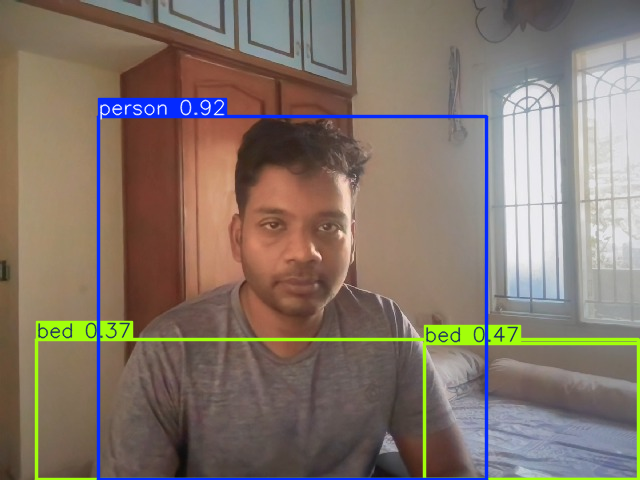

In [6]:
# Capture image from webcam
frame = capture_webcam()

# Run YOLO on the captured frame
results = model(frame)

# Show output
for result in results:
    result.show()
